In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [9]:
data = pd.read_csv("train.csv")

In [10]:
data = data.drop('id', axis=1)
data = data.drop('Name', axis=1)
data = data.drop('City', axis=1)

In [11]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Apply Label Encoding to each categorical column
for column in data.columns:
    data[column] = label_encoder.fit_transform(data[column])

In [12]:
data.corr()["Depression"]

Gender                                   0.008144
Age                                     -0.564671
Working Professional or Student         -0.520790
Profession                               0.353820
Academic Pressure                       -0.330096
Work Pressure                            0.458860
CGPA                                    -0.419718
Study Satisfaction                      -0.508850
Job Satisfaction                         0.281348
Sleep Duration                           0.014454
Dietary Habits                           0.143445
Degree                                  -0.045514
Have you ever had suicidal thoughts ?    0.349066
Work/Study Hours                         0.191746
Financial Stress                         0.227228
Family History of Mental Illness         0.016502
Depression                               1.000000
Name: Depression, dtype: float64

In [13]:
data.drop(columns=["Gender","Sleep Duration","Degree","Family History of Mental Illness"],axis=1,inplace=True)

In [14]:
X = data.drop('Depression', axis=1)
y = data['Depression']

In [15]:
X

,Age,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Dietary Habits,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress
0,31,1,10,5,4,331,5,1,7,0,1,1
1,8,1,55,5,3,331,5,2,20,1,7,2
2,15,0,64,4,5,265,1,5,7,1,3,0
3,4,1,55,5,4,331,5,0,15,1,10,0
4,12,1,9,5,0,331,5,0,20,1,9,3
...,...,...,...,...,...,...,...,...,...,...,...,...
140695,0,1,64,5,4,331,5,3,20,0,2,3
140696,23,1,15,5,4,331,5,3,15,1,6,4
140697,6,1,38,5,2,331,5,0,15,0,4,3
140698,31,1,47,5,4,331,5,1,15,1,10,0


In [25]:
acc_score = []
seeds = range(0,101,5)

In [26]:
for seed in seeds:
    print(seed)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

    y_train = to_categorical(y_train, num_classes=2)  # Replace 3 with the number of classes
    y_test = to_categorical(y_test, num_classes=2)

    # Initialize the model
    model = Sequential()

    # Add layers
    model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))  # First hidden layer
    model.add(Dense(32, activation='relu'))  # Second hidden layer
    model.add(Dense(2, activation='softmax'))  # Output layer for multi-class classification    
    # Compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=10, batch_size=100, validation_split=0.2, verbose=1)
    test_loss, test_accuracy = model.evaluate(X_test, y_test)
    acc_score.append(test_accuracy)

0
Epoch 1/10
901/901 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8753 - loss: 0.8000 - val_accuracy: 0.9307 - val_loss: 0.1723
Epoch 2/10
901/901 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9237 - loss: 0.1883 - val_accuracy: 0.9215 - val_loss: 0.2160
Epoch 3/10
901/901 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9246 - loss: 0.1907 - val_accuracy: 0.9334 - val_loss: 0.1680
Epoch 4/10
901/901 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9261 - loss: 0.1894 - val_accuracy: 0.9174 - val_loss: 0.2298
Epoch 5/10
901/901 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9290 - loss: 0.1812 - val_accuracy: 0.9182 - val_loss: 0.1997
Epoch 6/10
901/901 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9296 - loss: 0.1770 - val_accuracy: 0.9320 - val_loss: 0.1716
Epoch 7/10
901/901 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9272 - loss: 0.1842 - val_accuracy: 0.9252 - val_loss: 0.1881
Epoch 8/10
901/901 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9269 - loss: 0.1848 - val_accuracy: 

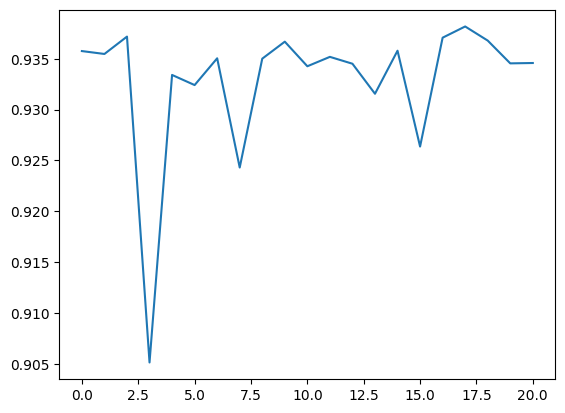

In [27]:
import matplotlib.pyplot as plt
plt.plot(acc_score)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=acc_score.index(max(acc_score)))

y_train = to_categorical(y_train, num_classes=2)  # Replace 3 with the number of classes
y_test = to_categorical(y_test, num_classes=2)

# Initialize the model
model = Sequential()

# Add layers
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))  # First hidden layer
model.add(Dense(32, activation='relu'))  # Second hidden layer
model.add(Dense(2, activation='softmax'))  # Output layer for multi-class classification    
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=50, batch_size=100, validation_split=0.2, verbose=1)
test_loss, test_accuracy = model.evaluate(X_test, y_test)

Epoch 1/50
901/901 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8816 - loss: 0.5185 - val_accuracy: 0.9258 - val_loss: 0.1772
Epoch 2/50
901/901 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9216 - loss: 0.1976 - val_accuracy: 0.9333 - val_loss: 0.1651
Epoch 3/50
901/901 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9241 - loss: 0.1931 - val_accuracy: 0.9342 - val_loss: 0.1640
Epoch 4/50
901/901 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9310 - loss: 0.1749 - val_accuracy: 0.9204 - val_loss: 0.2152
Epoch 5/50
901/901 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9306 - loss: 0.1720 - val_accuracy: 0.9362 - val_loss: 0.1587
Epoch 6/50
901/901 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9279 - loss: 0.1794 - val_accuracy: 0.9206 - val_loss: 0.1949
Epoch 7/50
901/901 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9271 - loss: 0.1854 - val_accuracy: 0.9217 - val_loss: 0.1937
Epoch 8/50
901/901 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9298 - loss: 0.1764 - val_accuracy: 0.

In [29]:
test_accuracy

0.9357143044471741

In [ ]:
accuracy: 0.9353 - loss: 0.1607

In [23]:
pre = pd.read_csv("test.csv")

In [17]:
data.columns

Index(['Gender', 'Age', 'Working Professional or Student', 'Profession',
       'Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction',
       'Job Satisfaction', 'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')

In [18]:
pre = pre[['Gender', 'Age', 'Working Professional or Student', 'Profession',
       'Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction',
       'Job Satisfaction', 'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness']]

In [19]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Apply Label Encoding to each categorical column
for column in pre.columns:
    pre[column] = label_encoder.fit_transform(pre[column])

In [20]:
# Predict on new data
predictions = model.predict(pre)
predicted_classes = np.argmax(predictions, axis=1)


print(f"Predicted classes: {predicted_classes}")


2932/2932 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
Predicted classes: [0 0 0 ... 0 1 0]


In [21]:
predicted_classes

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [24]:
pd.DataFrame({"id":pre["id"],"Depression":predicted_classes.tolist()}).to_csv("try_nn.txt",index=False)